In [3]:
#!pip install pandas

In [2]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt

# Function to process the CSV and return the path to the filtered temporary file
def filter_csv(input_file_path):
    # Create the output file path by appending "-temp" before the file extension
    base, ext = os.path.splitext(input_file_path)
    output_file_path = base + "-temp" + ext
    first_line = True  # Flag to indicate the first line in the file
    # Open the output file in write mode to start empty
    with open(output_file_path, 'w') as outfile:
        # Read the original file and filter out rows containing "timestamp"
        with open(input_file_path, 'r') as infile:
            for line in infile:
                if first_line or "timestamp" not in line:  # Skip lines containing "timestamp"
                    outfile.write(line)
                    first_line = False
    
    # Return the path of the filtered temporary file
    return output_file_path

# Define the file paths
apiPecker_path = "C:/Personal/ISA/telemetry/oas-telemetry-tester/outputs/response-times-tc01-03.csv"
dockerStats_path = "C:/Personal/ISA/telemetry/oas-telemetry-tester/outputs/docker-stats.csv"

# Filter the files and get the paths to the filtered versions
# filter_csv(apiPecker_path)
filtered_apiPecker_path = "C:/Personal/ISA/telemetry/oas-telemetry-tester/outputs/response-times-tc01-03-temp.csv"
# filter_csv(dockerStats_path)
filtered_dockerStats_path = "C:/Personal/ISA/telemetry/oas-telemetry-tester/outputs/docker-stats-temp.csv"

# Read the filtered API Pecker data
apiPecker_data = pd.read_csv(filtered_apiPecker_path)
print("apiPecker_data after filtering shape:", apiPecker_data.shape)
apiPecker_data['timestamp'] = pd.to_datetime(apiPecker_data['timestamp'])  # Convert the timestamp to datetime
print(apiPecker_data.dtypes)  # Check data types after filtering

print("-----------------------------------")

# Read the filtered Docker stats data
dockerStats_data = pd.read_csv(filtered_dockerStats_path)
print("dockerStats_data after filtering shape:", dockerStats_data.shape)
dockerStats_data['timestamp'] = pd.to_datetime(dockerStats_data['timestamp'])  # Convert the timestamp to datetime
print(dockerStats_data.dtypes)  # Check data types after filtering

apiPecker_data after filtering shape: (1772, 28)
timestamp                                 datetime64[ns, UTC]
responseTime                                          float64
testname                                               object
minutesPerTest                                          int64
repeatTestCount                                         int64
telemetryInApp                                           bool
orderOfMagnitude.name                                  object
orderOfMagnitude.value                                  int64
orderOfMagnitude.estimatedResponseTime                  int64
orderOfMagnitude.secureResponseTime                     int64
baseURL                                                object
concurrentUsers                                         int64
agreementId                                            object
currentIteration                                        int64
telemetryStatus                                        object
requests             

In [3]:
import pandas as pd
from IPython.display import display


# # Remove rows where the timestamp column has the value "timestamp"
# print("Data.shape:", apiPecker_data.shape)
# apiPecker_data = apiPecker_data[apiPecker_data.timestamp != "timestamp"]
# print("Data.shape afer removing headers between data:", apiPecker_data.shape)





# Print the shape of the dataframe (number of rows and columns)

# Display the first few rows of the dataframe
display(apiPecker_data.head(1))
display(dockerStats_data.head(1))


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
0,2024-09-09 22:59:05.083000+00:00,3127.324,TC-001 Registry Enabler,1,3,True,small,1,1500,3000,...,92.098,1.297,62.962,2048,0.094,164.484,2.094,132.364,2048,0.094


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,memory_stats.stats.writeback,memory_stats.limit,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time
0,2024-09-09 22:59:06.082000+00:00,TC-001 Registry Enabler,http://localhost:5400,3,1,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,0,4194304000,4349386161,350000000,3960000000,166003154230000000,8,0,0,0


In [4]:


# Función para calcular el porcentaje de CPU
def calculate_cpu_percent(stats):
    previous_cpu = float(stats['precpu_stats.cpu_usage.total_usage'])
    cpu_delta = stats['cpu_stats.cpu_usage.total_usage']- previous_cpu
    
    previous_system = stats['precpu_stats.system_cpu_usage']
    system_delta = stats['cpu_stats.system_cpu_usage'] - previous_system

    if system_delta > 0.0 and cpu_delta > 0.0:
        cpu_percent = (cpu_delta / system_delta) * stats['cpu_stats.online_cpus'] * 100.0
    else:
        cpu_percent = 0.0
    return cpu_percent

# Aplicamos la función para obtener el porcentaje de CPU y creamos una nueva columna
dockerStats_data['cpu_percent'] = dockerStats_data.apply(calculate_cpu_percent, axis=1)



def calculate_memory_percent(stats):
    used_memory = stats['memory_stats.usage']
    memory_limit = stats['memory_stats.limit']
    return (used_memory / memory_limit) * 100.0

dockerStats_data['memory_percent'] = dockerStats_data.apply(calculate_memory_percent, axis=1)

# Display the first few rows of the dataframe (just memory_percent and cpu_percent columns)
display(dockerStats_data[['memory_percent', 'cpu_percent']].head(10))

,memory_percent,cpu_percent
0,3.074707,98.308907
1,3.077930,6.146521
2,3.856445,128.601343
3,5.038477,96.102181
4,4.137207,121.808611
5,4.151855,4.666108
6,3.864355,106.296586
7,4.717871,100.361350
8,4.716699,1.425256
9,5.287500,98.100621


In [5]:


no_index_data = apiPecker_data.copy()
# convert to float responseTime and used_heap+size_after
no_index_data['responseTime'] = no_index_data['responseTime'].astype(float)
no_index_data['used_heap_size_after'] = no_index_data['used_heap_size_after'].astype(float)

tc01_data = no_index_data[no_index_data['testname'].str.contains("TC-001")]
tc02_data = no_index_data[no_index_data['testname'].str.contains("TC-002")]
tc03_data = no_index_data[no_index_data['testname'].str.contains("TC-003")]

no_index_data_docker = dockerStats_data.copy()
tc01_data_docker = no_index_data_docker[no_index_data_docker['testname'].str.contains("TC-001")]
tc02_data_docker = no_index_data_docker[no_index_data_docker['testname'].str.contains("TC-002")]
tc03_data_docker = no_index_data_docker[no_index_data_docker['testname'].str.contains("TC-003")]


print("API PECKER")
display(tc01_data.head(1))
display(tc02_data.head(1))
display(tc03_data.head(1))
print("DOCKER")
display(tc01_data_docker.head(1))
display(tc02_data_docker.head(1))
display(tc03_data_docker.head(1))


API PECKER


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
0,2024-09-09 22:59:05.083000+00:00,3127.324,TC-001 Registry Enabler,1,3,True,small,1,1500,3000,...,92.098,1.297,62.962,2048,0.094,164.484,2.094,132.364,2048,0.094


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
156,2024-09-09 23:17:05.421000+00:00,3168.312,TC-002 Registry Intervals,1,1,True,small,1,1500,3000,...,91.852,1.297,60.352,2048,0.094,153.484,2.094,100.904,2048,0.094


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
234,2024-09-09 23:26:05.241000+00:00,3196.087,TC-003 Registry Enabler Long Run,30,1,True,small,1,1500,3000,...,92.098,1.297,66.551,2048,0.094,153.984,2.094,101.881,2048,0.094


DOCKER


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time,cpu_percent,memory_percent
0,2024-09-09 22:59:06.082000+00:00,TC-001 Registry Enabler,http://localhost:5400,3,1,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,4349386161,350000000,3960000000,166003154230000000,8,0,0,0,98.308907,3.074707


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time,cpu_percent,memory_percent
734,2024-09-09 23:17:06.421000+00:00,TC-002 Registry Intervals,http://localhost:5400,1,1,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,4389259399,400000000,3960000000,166011776810000000,8,0,0,0,97.493055,3.064844


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time,cpu_percent,memory_percent
1109,2024-09-09 23:26:06.240000+00:00,TC-003 Registry Enabler Long Run,http://localhost:5400,1,30,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,5658962526,540000000,5150000000,166016082750000000,8,0,0,0,85.519744,3.358887


In [6]:
import numpy as np

def escape_latex_special_chars(text):
    """
    Replaces special LaTeX characters in the given string.
    """
    special_chars = {'_': '\\_', '&': '\\&', '%': '\\%', '$': '\\$', '#': '\\#', 
                     '{': '\\{', '}': '\\}', '~': '\\textasciitilde{}', 
                     '^': '\\textasciicircum{}', '\\': '\\textbackslash{}'}
    return ''.join(special_chars.get(c, c) for c in text)

def latex(val, bold=False):
    result = ""
    if val is None:
        result = "-"
    elif isinstance(val, float):
        result = f"{val:.2f}"
    else:
        result = str(val)
    result = escape_latex_special_chars(result)
    if bold:
        result = f"\\textbf{{{result}}}"
    return result

def generate_latex_table(data, caption=None,label=None, bold_firsts=True):
    """
    Generate a LaTeX table from a 2D list of data.
    :param data: The 2D list of data to be converted to a LaTeX table.
    :param caption: The caption for the table.
    :param bold_firsts: Whether to bold the first row and column.
    """

    # Determine the number of rows and columns
    num_rows = len(data)
    num_cols = max(len(row) for row in data)

    
    # Start the LaTeX table
    latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{" + "c".join(['|'] * (num_cols+1)) + "}\n"
    latex_table += "\\hline\n"
    
    # Add the table rows
    for i in range(num_rows):
        if len(data[i]) < num_cols:
            data[i] += [None] * (num_cols - len(data[i]))
        line = []
        for j in range(num_cols):
            cell_data = data[i][j]
            line.append(latex(cell_data, bold= (bold_firsts and (i == 0 or j == 0))))
        latex_table += " & ".join(line) + " \\\\\n"
        latex_table += "\\hline\n"


    # End the LaTeX table
    latex_table += "\\end{tabular}\n"
    if caption:
        latex_table += f"\\caption{{{caption}}}\n"
    if label:
        latex_table += f"\\label{{{label}}}\n"
    latex_table += "\\end{table}"
    
    print(latex_table)




In [7]:

def tc01_relative_change(tc01_data, columns, columns_names, show_table=False, show_plot=True):
    for i in range(len(columns)):
        column = columns[i]
        column_name = columns_names[i]

        orderOfMagnitudeNames = ["Small", "Medium", "Large"]
        relative_change_data = {}



        # Create figure
        if show_plot:
            fig, ax = plt.subplots()
            ax.set_title("Relative Change in " + column_name + " between TLM and NO_TLM")
            ax.set_ylabel(column_name + " difference")
            ax.set_xlabel("Problem difficulty order")

        for orderOfMagnitude in orderOfMagnitudeNames:
            TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == True) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude.lower()), column]
            TLM_mean = TLM_data.mean()
            TLM_std = TLM_data.std()

            NO_TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == False) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude.lower()), column]
            NO_TLM_mean = NO_TLM_data.mean()
            NO_TLM_std = NO_TLM_data.std()

            relative_change = (TLM_mean - NO_TLM_mean) / NO_TLM_mean if NO_TLM_mean != 0 else float('nan')

            table_data = [["", "TLM", "NO_TLM", "Relative Change"]]
            table_data.append(["min", TLM_data.min(), NO_TLM_data.min(), ""])
            table_data.append(["max", TLM_data.max(), NO_TLM_data.max(), ""])
            table_data.append(["mean", TLM_mean, NO_TLM_mean, relative_change])
            table_data.append(["std", TLM_std, NO_TLM_std, ""])

            if show_plot:
                ax.bar(orderOfMagnitude, relative_change)

            if show_table:
                generate_latex_table(table_data, caption=f"Statistics for {column_name} with order of magnitude {orderOfMagnitude}", label=f"tab:tc01_{column}_{orderOfMagnitude}")
                print("\n\n")

        # Display plot if requested
        if show_plot:
            plt.savefig("plots/Test1_" + column + "_relative_change.png")
            plt.show()



# Example call
# tc01_relative_change(tc01_data, ["responseTime"], ["Response Time"], show_table=True, show_plot=True)


In [8]:
columns = ["responseTime"] #"used_heap_size_after"
columns_names = ["ResponseTime"] #,"Used Memory"
tc01_relative_change(tc01_data, columns, columns_names, show_table=True, show_plot=False)

\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{} & \textbf{TLM} & \textbf{NO\_TLM} & \textbf{Relative Change} \\
\hline
\textbf{min} & 1715.62 & 1747.28 &  \\
\hline
\textbf{max} & 4420.92 & 4366.22 &  \\
\hline
\textbf{mean} & 2318.10 & 2343.28 & -0.01 \\
\hline
\textbf{std} & 644.14 & 667.89 &  \\
\hline
\end{tabular}
\caption{Statistics for ResponseTime with order of magnitude Small}
\label{tab:tc01_responseTime_Small}
\end{table}



\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{} & \textbf{TLM} & \textbf{NO\_TLM} & \textbf{Relative Change} \\
\hline
\textbf{min} & 4649.32 & 4721.53 &  \\
\hline
\textbf{max} & 6341.60 & 6318.22 &  \\
\hline
\textbf{mean} & 5390.86 & 5443.93 & -0.01 \\
\hline
\textbf{std} & 573.49 & 549.29 &  \\
\hline
\end{tabular}
\caption{Statistics for ResponseTime with order of magnitude Medium}
\label{tab:tc01_responseTime_Medium}
\end{table}



\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\text

In [9]:
# columns = ["cpu_percent","memory_percent"]
# columns_names = ["CPU percent","Memory percent"]
# tc01_relative_change(tc01_data_docker, columns, columns_names)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Now tc01 but in a 6-column boxplot

def tc01_boxplot(tc01_data, columns, columns_names):
    for i in range(len(columns)):
        column = columns[i]
        column_name = columns_names[i]
        
        # Create figure and axis
        fig, ax = plt.subplots(figsize=(8, 6),dpi=200)
        data1_arrays = []
        for orderOfMagnitude in ["small", "medium", "large"]:
            print("\nOrder of magnitude: ", orderOfMagnitude)
            
            # Get data for TLM (telemetry enabled)
            TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == True) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude), column]
            TLM_mean = TLM_data.mean()
            TLM_max = TLM_data.max()
            TLM_min = TLM_data.min()

            # print("TELEMETRY", column_name)
            # print(" - min: ", TLM_min)
            # print(" - max: ", TLM_max)
            # print("- mean: ", TLM_mean)
            # print("- std: ", TLM_data.std())

            # Get data for NO_TLM (telemetry disabled)
            NO_TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == False) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude), column]
            NO_TLM_mean = NO_TLM_data.mean()
            # print("NO TELEMETRY", column_name)
            # print("- min: ", NO_TLM_data.min())
            # print("- max: ", NO_TLM_data.max())
            # print("- mean: ", NO_TLM_mean)
            # print("- std: ", NO_TLM_data.std())

            # Append data to arrays for boxplot
            data1_arrays.append(NO_TLM_data)
            data1_arrays.append(TLM_data)
        
        # Create boxplot with specific labels
        ax.boxplot(data1_arrays, labels=[
            "small\nNO_TLM", "small\nTLM", 
            "medium\nNO_TLM", "medium\nTLM", 
            "large\nNO_TLM", "large\nTLM"
        ])

        # Add title and format
        fig.suptitle(f"TC-01: {column_name} by telemetry status and problem difficulty", fontsize=16)
        
        # Adjust layout to prevent label overlap
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reserve space for the title

        # Save the figure as a PNG file
        fig.savefig(f"plots/Test1_{column}_boxplot.png")

        #x-axis label
        ax.set_xlabel("Problem difficulty (order of magnitude) by telemetry status", fontsize=13)
        #y-axis label
        ax.set_ylabel(column_name, fontsize=13)
        #bigger labels

        # Show the plot
        plt.show()



Order of magnitude:  small

Order of magnitude:  medium

Order of magnitude:  large


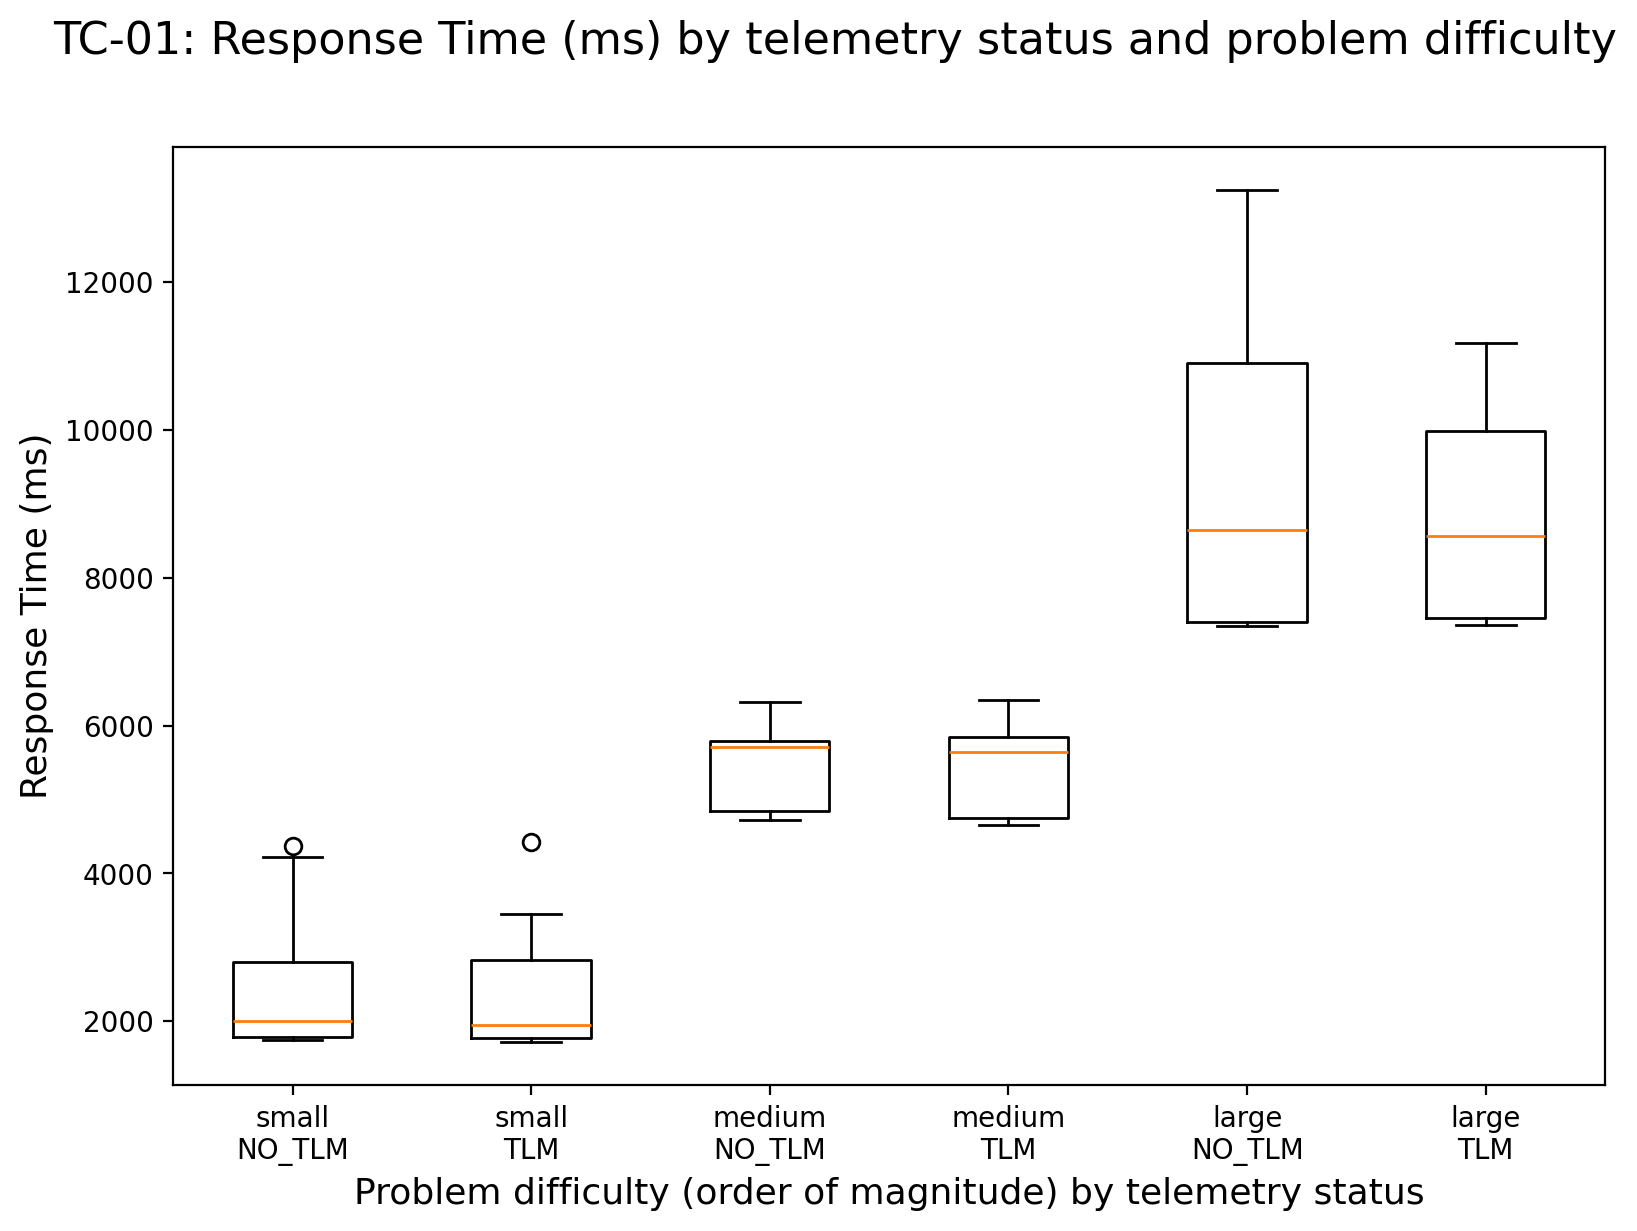

In [11]:
columns = ["responseTime"]#, "used_heap_size_after"]
columns_names = ["Response Time (ms)"]#, "Used Memory (MB)"]
tc01_boxplot(tc01_data, columns, columns_names)

# will use table


Order of magnitude:  small

Order of magnitude:  medium

Order of magnitude:  large


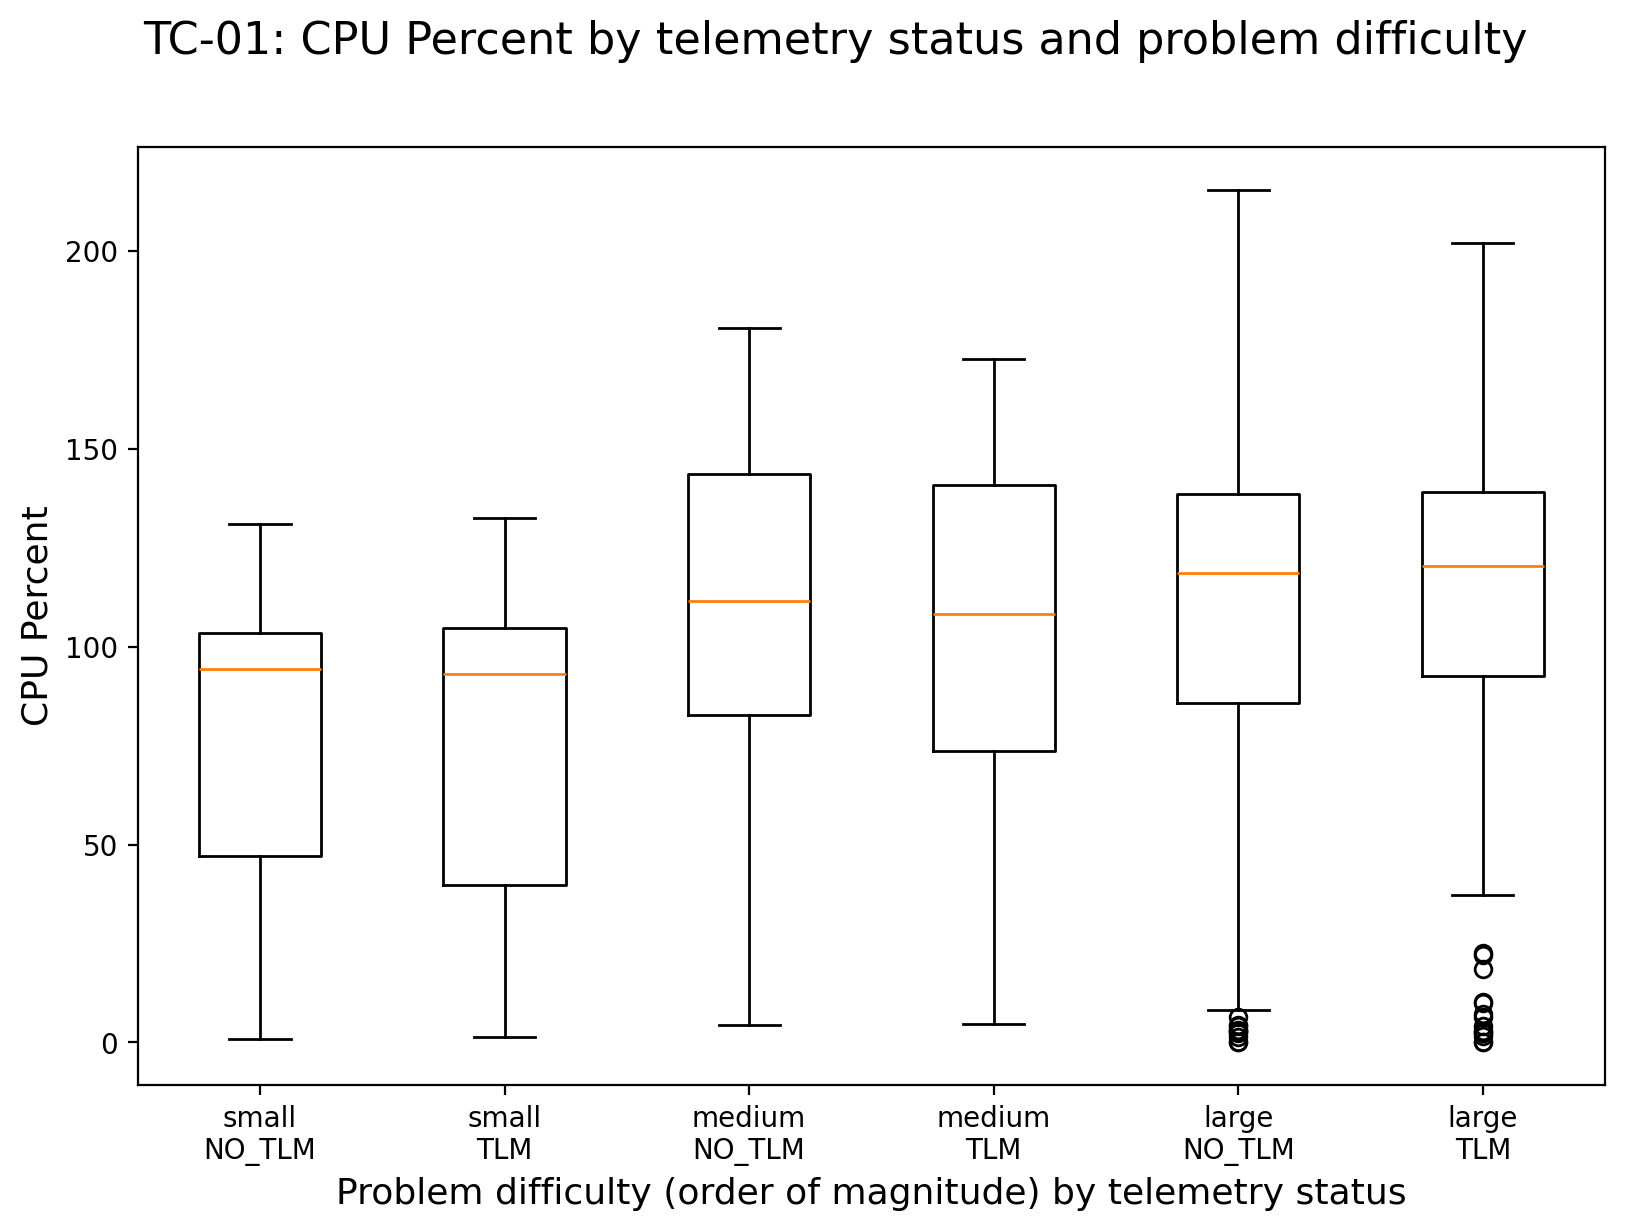


Order of magnitude:  small

Order of magnitude:  medium

Order of magnitude:  large


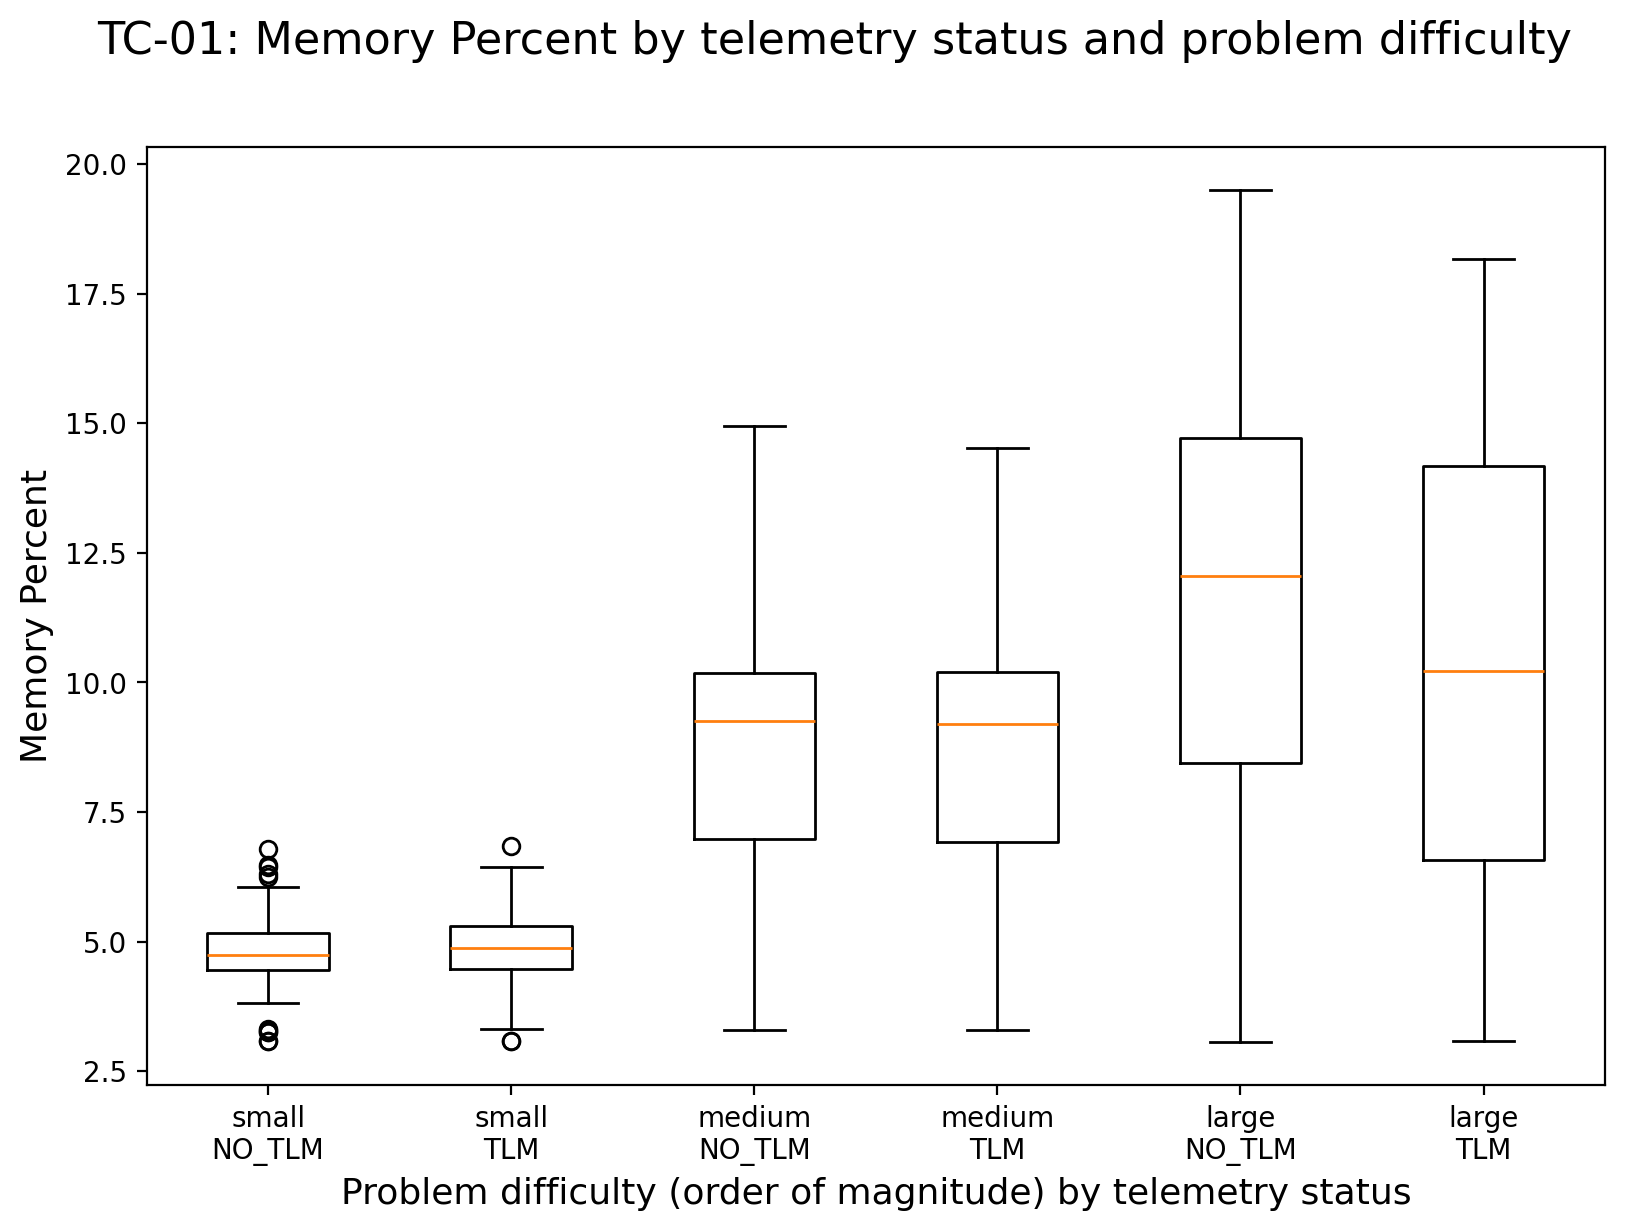

In [14]:
columns = ["cpu_percent","memory_percent"]
columns_names = ["CPU Percent","Memory Percent"]
tc01_boxplot(tc01_data_docker, columns, columns_names)

In [37]:
columns = ["memory_percent","cpu_percent"]
columns_names = ["Memory Percent","CPU Percent"]
tc01_relative_change(tc01_data_docker, columns, columns_names, show_table=True, show_plot=False)

\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{} & \textbf{TLM} & \textbf{NO\_TLM} & \textbf{Relative Change} \\
\hline
\textbf{min} & 3.07 & 3.08 &  \\
\hline
\textbf{max} & 6.85 & 6.78 &  \\
\hline
\textbf{mean} & 4.85 & 4.78 & 0.01 \\
\hline
\textbf{std} & 0.63 & 0.64 &  \\
\hline
\end{tabular}
\caption{Statistics for Memory Percent with order of magnitude Small}
\label{tab:tc01_memory_percent_Small}
\end{table}



\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{} & \textbf{TLM} & \textbf{NO\_TLM} & \textbf{Relative Change} \\
\hline
\textbf{min} & 3.29 & 3.30 &  \\
\hline
\textbf{max} & 14.51 & 14.95 &  \\
\hline
\textbf{mean} & 8.61 & 8.65 & -0.00 \\
\hline
\textbf{std} & 2.49 & 2.57 &  \\
\hline
\end{tabular}
\caption{Statistics for Memory Percent with order of magnitude Medium}
\label{tab:tc01_memory_percent_Medium}
\end{table}



\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{} & \textbf{TLM} & \textbf{NO\_T

In [33]:

# TEST TYPE 2

# Define replacements
# replaceDict = {
#     "STARTED": "1 STARTED",
#     "STOPPED": "2 STOPPED",
#     "RESTARTED": "3 RESTARTED"
# }

def getOrderOfMagnitudeValue(name):
    if name == "small":
        return 1
    if name == "medium":
        return 24
    if name == "large":
        return 24*2

def print_boxplot(data, column,column_name, order):
    data.loc[:, column] = pd.to_numeric(data[column], errors='coerce')
    data_clean = data.dropna(subset=[column])
    plt.figure(dpi=200)
    data_clean.boxplot(column=column, by='telemetryStatus', figsize=(8, 6), showfliers=False)
    plt.title(column_name+" by phases of the test. \nOrder of the problem size: "+order)
    plt.suptitle('')
    # to modify the dpi you should have done:
    plt.ylabel(column_name)
    plt.xlabel("Phases of the tests")
    plt.ylim(0)

    plt.savefig("plots/Test2_"+column+"_"+order+"boxplot.png")
    plt.show()






In [34]:
def tc02_box_plot(tc02_data, columns, columns_names):
    for i in range(len(columns)):
        column = columns[i]
        column_name = columns_names[i]
        for orderOfMagnitude in ["small", "medium", "large"]:
            print("\nOrder of magnitude: ", orderOfMagnitude)
            data2_in_order = tc02_data[tc02_data['orderOfMagnitude.name'] == orderOfMagnitude]
            print_boxplot(data2_in_order, column, column_name, orderOfMagnitude)



In [35]:
# # Replace values in the column
# print(tc02_data.shape)
# # tc02_data['telemetryStatus'] = tc02_data['telemetryStatus'].replace(replaceDict)
# print(tc02_data.shape)
# columns = ["responseTime"]#, "used_heap_size_after"]
# columns_names = ["Response Time (ms)"]#, "Used Memory (MB)"]
# tc02_box_plot(tc02_data, columns, columns_names)


Order of magnitude:  small


<Figure size 1280x960 with 0 Axes>

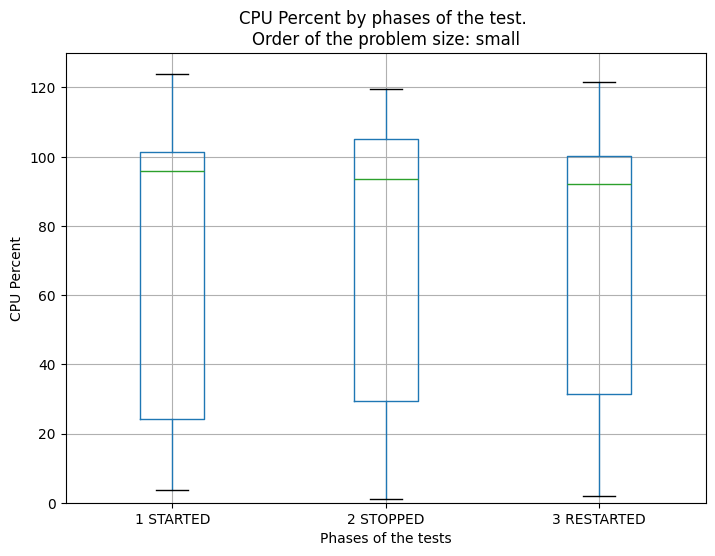


Order of magnitude:  medium


<Figure size 1280x960 with 0 Axes>

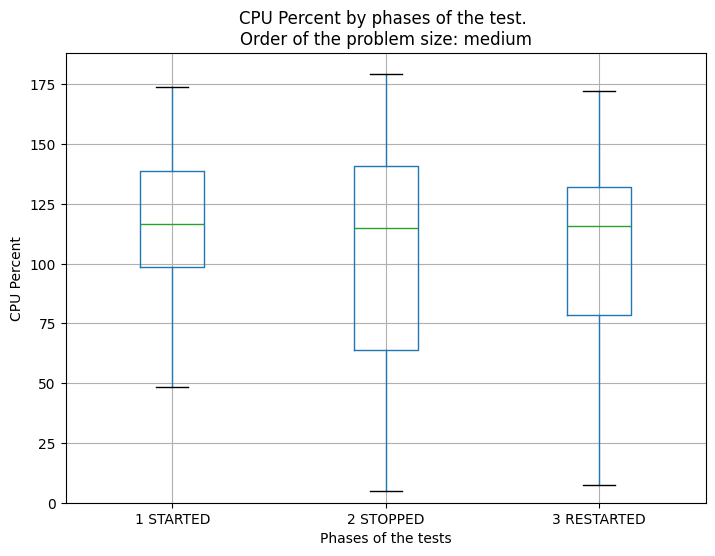


Order of magnitude:  large


<Figure size 1280x960 with 0 Axes>

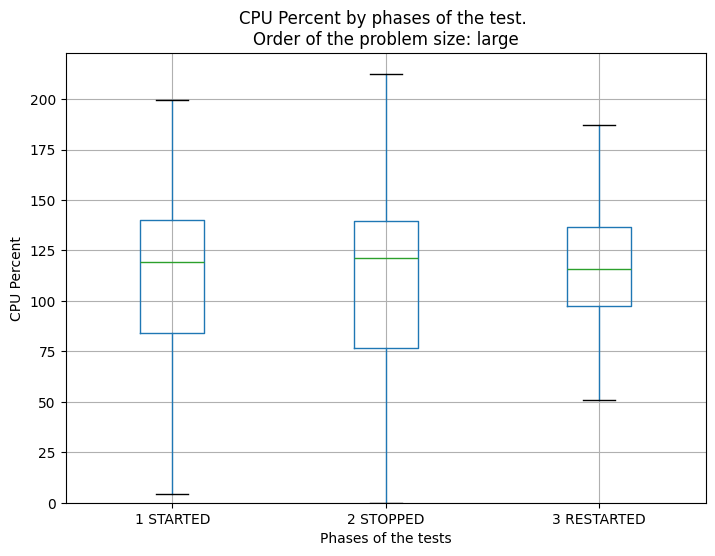


Order of magnitude:  small


<Figure size 1280x960 with 0 Axes>

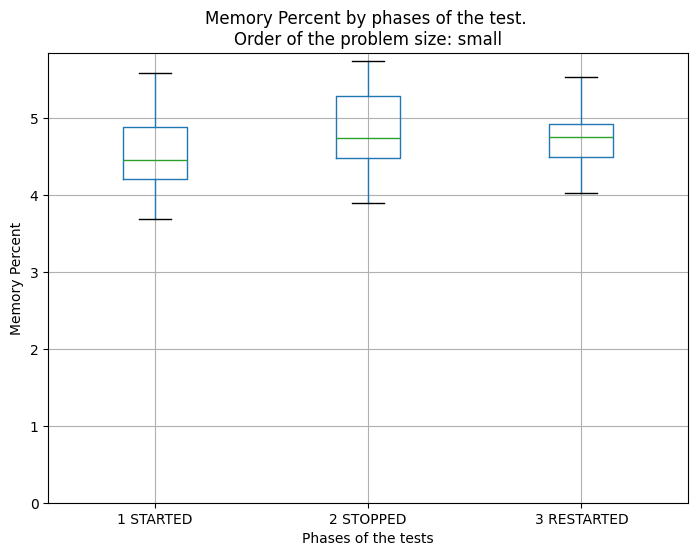


Order of magnitude:  medium


<Figure size 1280x960 with 0 Axes>

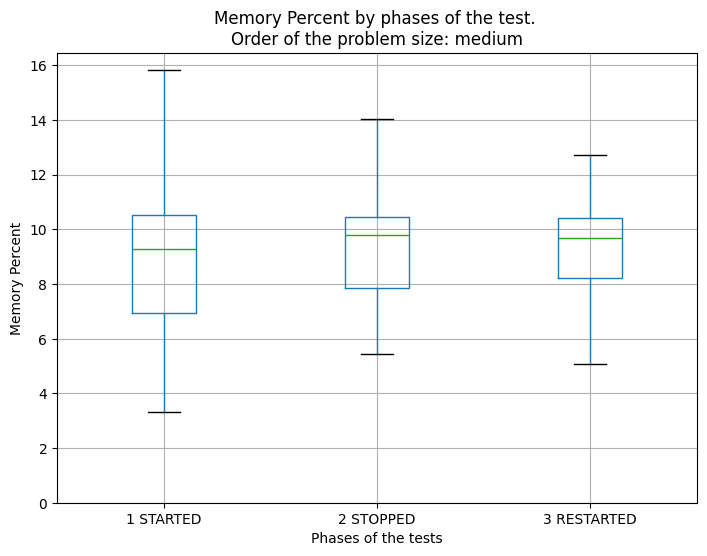


Order of magnitude:  large


<Figure size 1280x960 with 0 Axes>

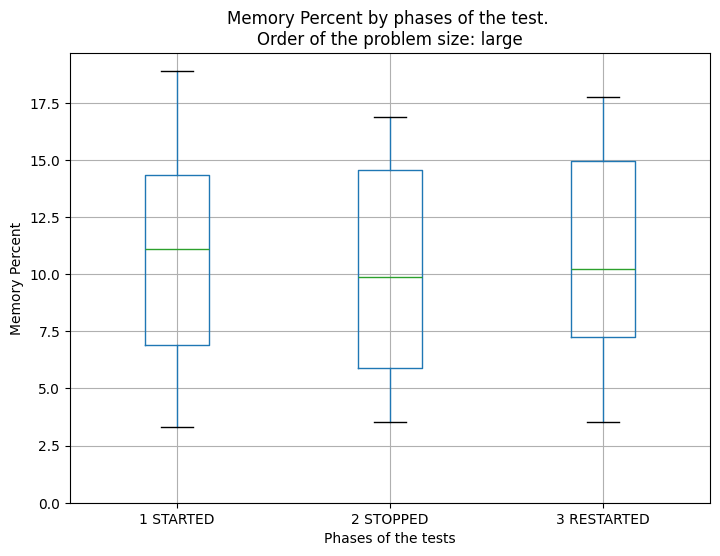

In [36]:
# tc02_data_docker['telemetryStatus'] = tc02_data_docker['telemetryStatus'].replace(replaceDict)
columns = ["cpu_percent", "memory_percent"]
columns_names = ["CPU Percent", "Memory Percent"]
tc02_box_plot(tc02_data_docker, columns, columns_names)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def getSecureResponseTime(orderOfMagnitude):
    result = 0
    if orderOfMagnitude == "small":
        result = 3000
    elif orderOfMagnitude == "medium":
        result = 6000
    elif orderOfMagnitude == "large":
        result = 10000
    return result

def tc03_plot(tc03_data, columns, columns_names, window_size=5, is_docker=False):
    orderOfMagnitudeNames = ["small", "medium", "large"]
    telemetryInAppValues = [True, False]
    
    # Function to compute moving average
    def moving_average(data, window_size):
        return data.rolling(window=window_size, min_periods=1).mean()

    seconds_of_minute = [i for i in range(60)]
    mean_column_in_second = [0 for i in range(60)]
    # Plot data for different combinations of orderOfMagnitude and telemetryInApp
    for i in range(len(columns)):
        
        plt.figure(figsize=(10, 6),dpi=200)
        column = columns[i]
        column_name = columns_names[i]
        for orderOfMagnitude in orderOfMagnitudeNames:
            for telemetryInApp in telemetryInAppValues:
                # Filter the data
                data3 = tc03_data[tc03_data['orderOfMagnitude.name'] == orderOfMagnitude]
                data3 = data3[data3['telemetryInApp'] == telemetryInApp]
                print("telemetryInApp: ", telemetryInApp, " orderOfMagnitude: ", orderOfMagnitude, "n: ", len(data3))
                if is_docker:
                    x_values = [1.3 * i for i in range(len(data3))]
                if not is_docker: x_values = [1.3* i * getSecureResponseTime(orderOfMagnitude)/1000 for i in range(len(data3))] #1.3 because for every minute the test is halted for 20 seconds
                moving_avg = moving_average(data3[column], window_size)

                print("Timestamp of the max value: ", data3.loc[data3[column].idxmax()]['timestamp'])
                
                telemetryName = "TLM" if telemetryInApp else "NO_TLM"
                plt.plot(x_values, moving_avg, label=f'{telemetryName}, Order: {orderOfMagnitude}', marker='o', linestyle='-', linewidth=1, markersize=1)

        # Add labels and title
        # for x in range(60, int(max(x_values)), 60):
        #     plt.axvline(x=x, color='r', linestyle='--', linewidth=1)
        plt.xlabel('Time (s)')
        plt.ylabel(f'Moving Average (w={window_size}) of {column_name}')
        plt.ylim(0)
        plt.xlim(0,1680)
        plt.title(f'TC-03: Evolution of {column_name} over time')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"plots/Test3_{column}_plot.png")
        plt.show()
        # Save the figure as a PNG file


telemetryInApp:  True  orderOfMagnitude:  small n:  435
Timestamp of the max value:  2024-09-09 23:45:05.102000+00:00
telemetryInApp:  False  orderOfMagnitude:  small n:  450
Timestamp of the max value:  2024-09-10 01:10:17.174000+00:00
telemetryInApp:  True  orderOfMagnitude:  medium n:  203
Timestamp of the max value:  2024-09-10 00:00:23.125000+00:00
telemetryInApp:  False  orderOfMagnitude:  medium n:  210
Timestamp of the max value:  2024-09-10 01:40:29.515000+00:00
telemetryInApp:  True  orderOfMagnitude:  large n:  120
Timestamp of the max value:  2024-09-10 00:55:35.859000+00:00
telemetryInApp:  False  orderOfMagnitude:  large n:  120
Timestamp of the max value:  2024-09-10 02:25:35.261000+00:00


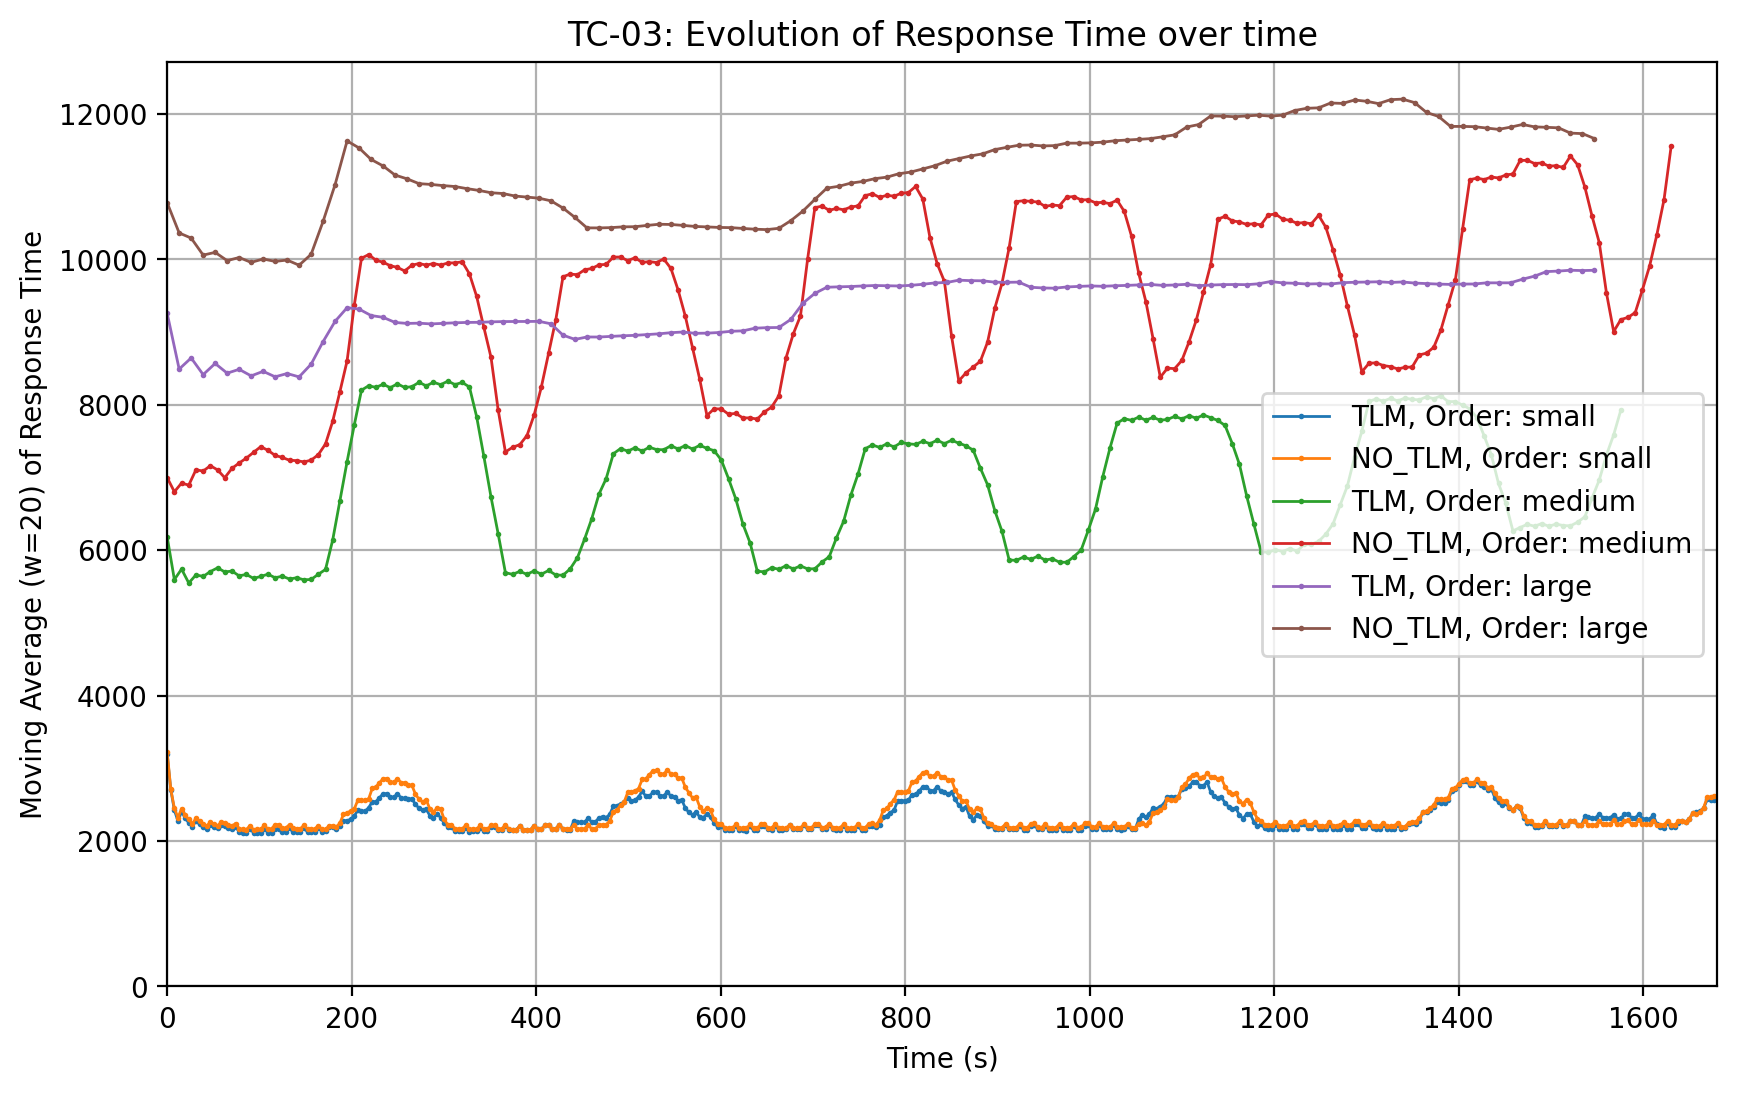

In [180]:
columns = ["responseTime"]#,"used_heap_size_after"]
columns_names = ["Response Time"]#,"Used Memory (MB)"]
tc03_plot(tc03_data, columns, columns_names, window_size=20)

telemetryInApp:  True  orderOfMagnitude:  small n:  1253
Timestamp of the max value:  2024-09-09 23:52:44.920000+00:00
telemetryInApp:  False  orderOfMagnitude:  small n:  1297
Timestamp of the max value:  2024-09-10 01:17:20.929000+00:00
telemetryInApp:  True  orderOfMagnitude:  medium n:  1301
Timestamp of the max value:  2024-09-10 00:25:42.151000+00:00
telemetryInApp:  False  orderOfMagnitude:  medium n:  1416
Timestamp of the max value:  2024-09-10 01:35:38.767000+00:00
telemetryInApp:  True  orderOfMagnitude:  large n:  1123
Timestamp of the max value:  2024-09-10 00:56:23.846000+00:00
telemetryInApp:  False  orderOfMagnitude:  large n:  1235
Timestamp of the max value:  2024-09-10 02:10:28.325000+00:00


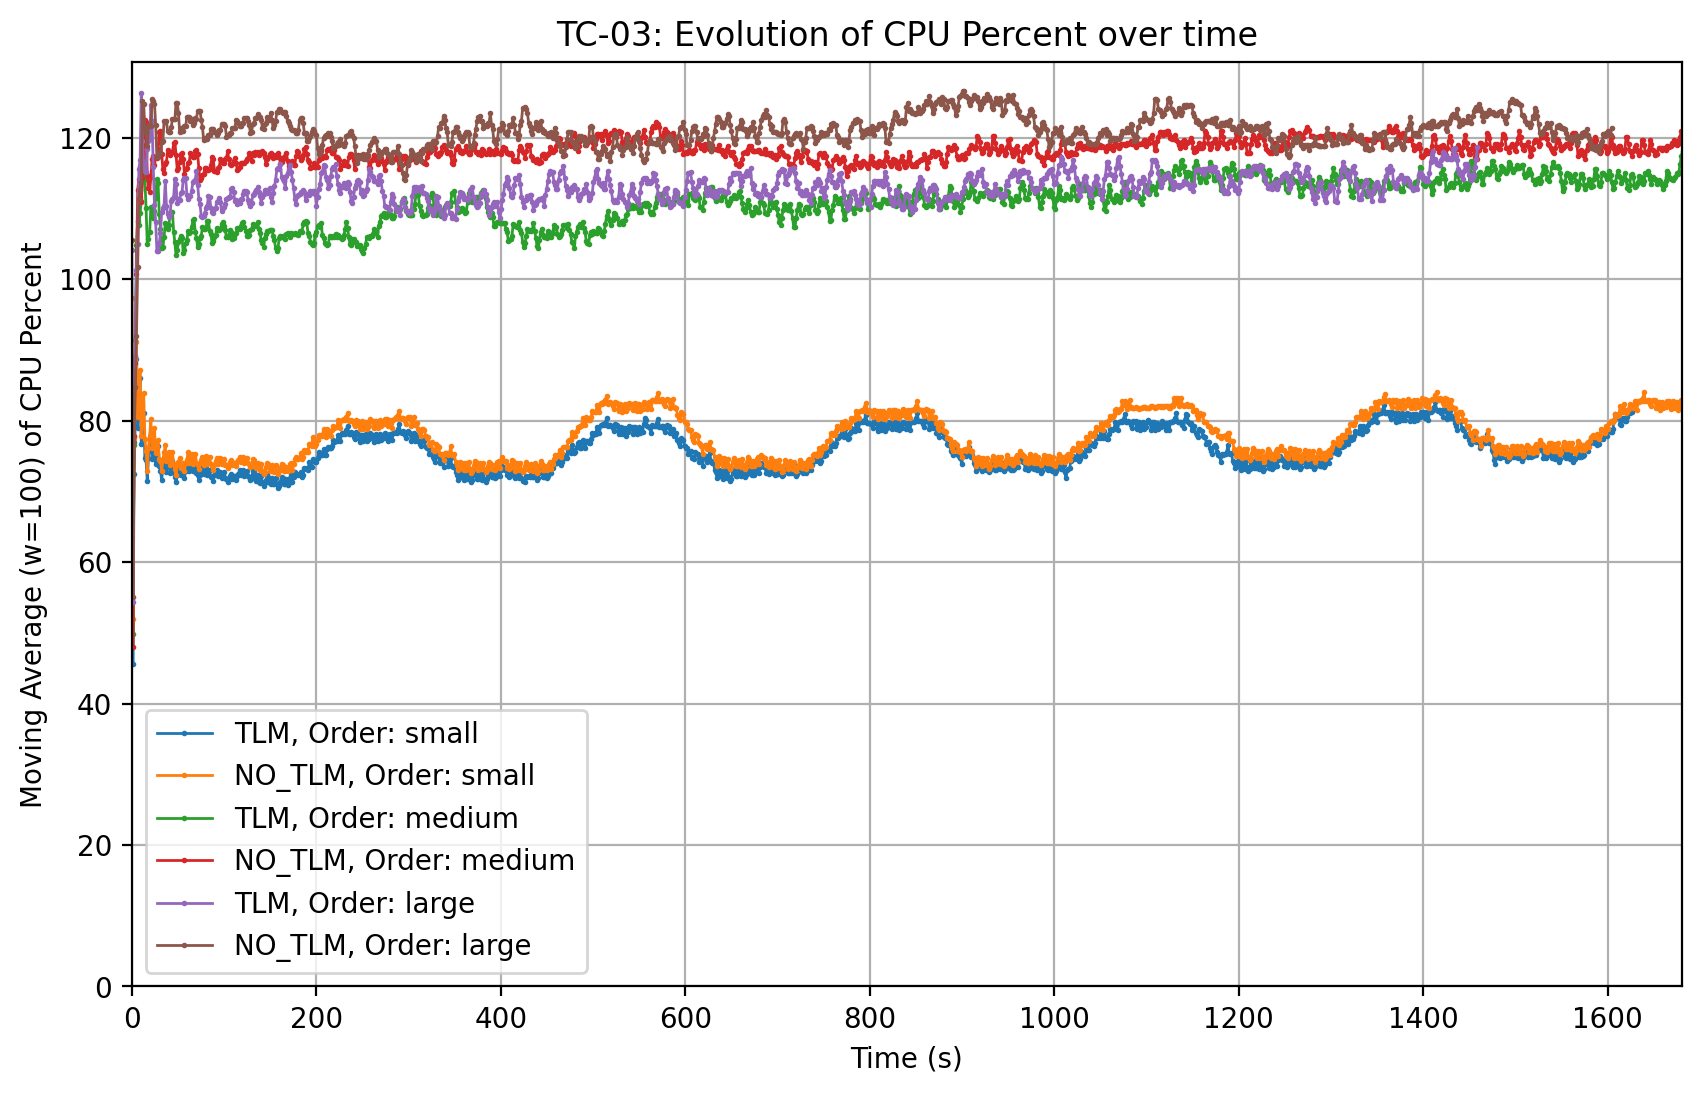

telemetryInApp:  True  orderOfMagnitude:  small n:  1253
Timestamp of the max value:  2024-09-09 23:52:10.820000+00:00
telemetryInApp:  False  orderOfMagnitude:  small n:  1297
Timestamp of the max value:  2024-09-10 01:10:26.236000+00:00
telemetryInApp:  True  orderOfMagnitude:  medium n:  1301
Timestamp of the max value:  2024-09-10 00:10:45.282000+00:00
telemetryInApp:  False  orderOfMagnitude:  medium n:  1416
Timestamp of the max value:  2024-09-10 01:45:47.884000+00:00
telemetryInApp:  True  orderOfMagnitude:  large n:  1123
Timestamp of the max value:  2024-09-10 00:51:10.694000+00:00
telemetryInApp:  False  orderOfMagnitude:  large n:  1235
Timestamp of the max value:  2024-09-10 02:30:38.679000+00:00


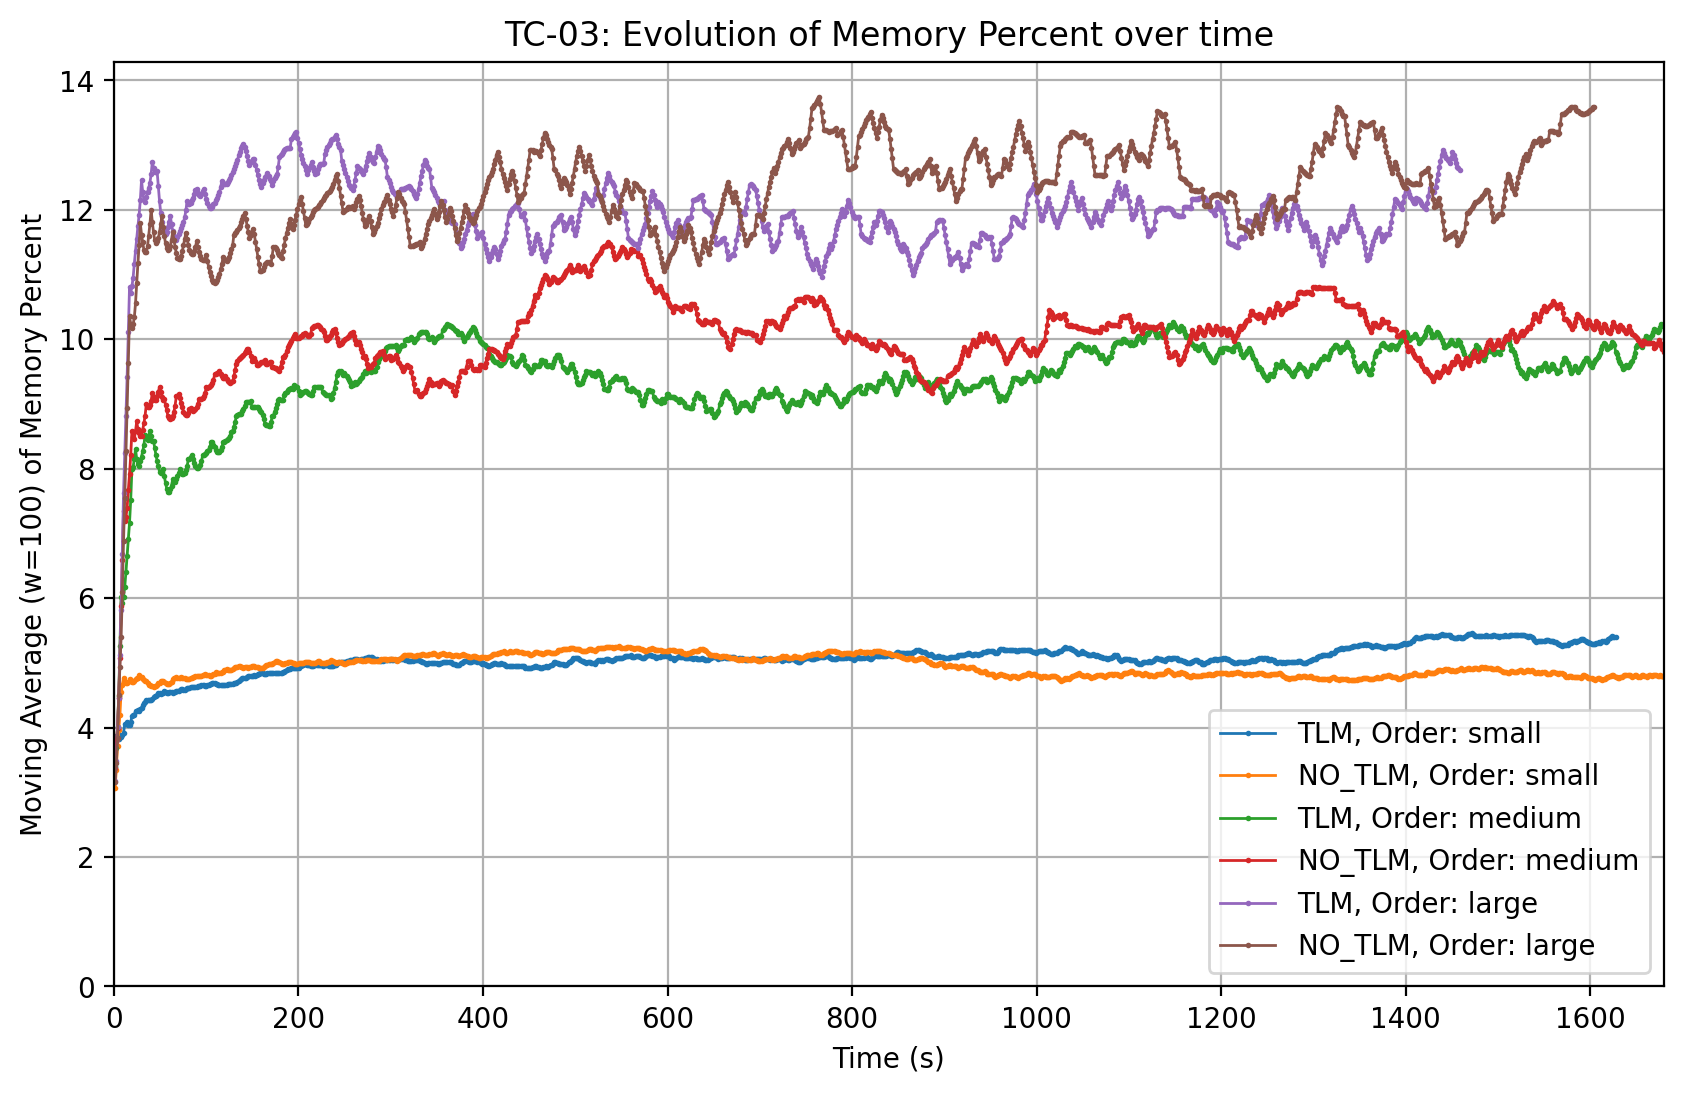

In [182]:
columns = ["cpu_percent","memory_percent"]
columns_names = ["CPU Percent","Memory Percent"]
tc03_plot(tc03_data_docker, columns, columns_names, window_size=100, is_docker=True)